# Air Quality Index Analysis


.Date and Time: Timestamp indicating when the air quality measurements were recorded.

.Location or Station ID: Identifier for the monitoring station where the air quality measurements were taken.

.Pollutants Concentrations: Columns containing concentrations or levels of various air pollutants. Common pollutants include:

.PM2.5 (Particulate Matter less than 2.5 micrometers in diameter)

.PM10 (Particulate Matter less than 10 micrometers in diameter)

.O3 (Ozone)

.NO2 (Nitrogen Dioxide)

.SO2 (Sulfur Dioxide)

.CO (Carbon Monoxide)

.AQI (Air Quality Index), which might be calculated based on the concentrations of multiple pollutants.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [15]:
air=pd.read_csv(r'C:\Users\femif\OneDrive\Documents\Desktop\downloading items\delhiaqi.csv')
air

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19
...,...,...,...,...,...,...,...,...,...
556,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
557,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
558,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
559,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


In [16]:
#Display the first few rows of the dataset
air.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [17]:
#check for rows and columns
air.shape

(561, 9)

In [6]:
#information about the data
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB


In [18]:
#check for null values
air.isnull().sum()

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

In [19]:
# descriptive statistics 
air.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062
std,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094
min,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000
25%,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000
50%,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000
75%,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000
max,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000


In [20]:
#convert the date column in the dataset into a datetime data type
air['date'] = pd.to_datetime(air['date'])

In [21]:
air['date']

0     2023-01-01 00:00:00
1     2023-01-01 01:00:00
2     2023-01-01 02:00:00
3     2023-01-01 03:00:00
4     2023-01-01 04:00:00
              ...        
556   2023-01-24 04:00:00
557   2023-01-24 05:00:00
558   2023-01-24 06:00:00
559   2023-01-24 07:00:00
560   2023-01-24 08:00:00
Name: date, Length: 561, dtype: datetime64[ns]

##### visualize the intensity of each pollutant over time in the air quality dataset

In [27]:
fig = go.Figure()

for pollutant in ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']:
    fig.add_trace(go.Scatter(x=air['date'], y=air[pollutant], mode='lines', 
                             name=pollutant))

fig.update_layout(title='Time Series Analysis of Air Pollutants in Delhi',
                  xaxis_title='Date', yaxis_title='Concentration (µg/m³)')
fig.show()

I check  the concentration of each pollutant over time.

In [31]:
pollutants = ["co", "no", "no2", "o3", "so2", "pm2_5", "pm10", "nh3"]
pollutant_colors = px.colors.qualitative.Plotly


total_concentrations = air[pollutants].sum()


concentration_data = pd.DataFrame({
    "Pollutant": pollutants,
    "Concentration": total_concentrations
})


fig = px.pie(concentration_data, names="Pollutant", values="Concentration",
             title="Pollutant Concentrations in Delhi",
             hole=0.4, color_discrete_sequence=pollutant_colors)


fig.update_traces(textinfo="percent+label")
fig.update_layout(legend_title="Pollutant")


fig.show()

The resulting output is a pie chart that visually represents the distribution of pollutant concentrations in Delhi.

the highest percentage of concentration is co,and lowest nh3

In [36]:
#correlatuion between pollutant
correlation_matrix = air[pollutants].corr()

In [37]:
correlation_matrix

,co,no,no2,o3,so2,pm2_5,pm10,nh3
co,1.000000,0.969740,0.776402,-0.463082,0.716831,0.953083,0.966801,0.826299
no,0.969740,1.000000,0.702201,-0.377813,0.734503,0.888810,0.903339,0.823638
no2,0.776402,0.702201,1.000000,-0.407177,0.734961,0.698696,0.720050,0.700254
o3,-0.463082,-0.377813,-0.407177,1.000000,-0.049158,-0.450458,-0.468477,-0.299663
so2,0.716831,0.734503,0.734961,-0.049158,1.000000,0.648996,0.658325,0.843635
pm2_5,0.953083,0.888810,0.698696,-0.450458,0.648996,1.000000,0.994088,0.720303
pm10,0.966801,0.903339,0.720050,-0.468477,0.658325,0.994088,1.000000,0.754468
nh3,0.826299,0.823638,0.700254,-0.299663,0.843635,0.720303,0.754468,1.000000


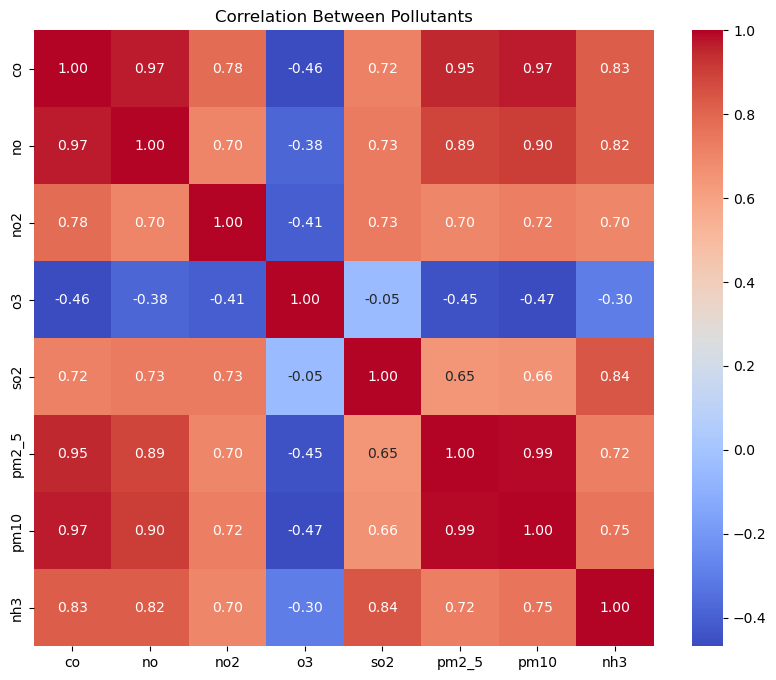

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Pollutants')
plt.show()

 the positive correlations among CO, NO, NO2, SO2, PM2.5, PM10, and NH3 suggest that they may share common sources or have similar pollution patterns, while O3 exhibits an inverse relationship with the other pollutants, which may be due to its role as both a pollutant and a natural atmospheric oxidant.

1 is positive correlation,-1 is negative correlation,and 0 is no correlation

## Calculating Air Quality Index

In [46]:
aqi_breakpoints = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400),
    (350.5, 500.4, 500)
]

def calculate_aqi(pollutant_name, concentration):
    for low, high, aqi in aqi_breakpoints:
        if low <= concentration <= high:
            return aqi
    return None

def calculate_overall_aqi(row):
    aqi_values = []
    pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
    for pollutant in pollutants:
        aqi = calculate_aqi(pollutant, row[pollutant])
        if aqi is not None:
            aqi_values.append(aqi)
    return max(aqi_values)

# Calculate AQI for each row
air['AQI'] = air.apply(calculate_overall_aqi, axis=1)

# Define AQI categories
aqi_categories = [
    (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
    (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
]

def categorize_aqi(aqi_value):
    for low, high, category in aqi_categories:
        if low <= aqi_value <= high:
            return category
    return None

# Categorize AQI
air['AQI Category'] = air['AQI'].apply(categorize_aqi)
print(air.head())

                 date       co     no    no2    o3    so2   pm2_5    pm10  \
0 2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1 2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2 2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3 2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4 2023-01-01 04:00:00  3471.37  68.84  45.24  5.45  39.10  266.36  322.80   

     nh3  hour  Hour  AQI    AQI Category  
0   5.83     0     0  300  Very Unhealthy  
1   7.66     1     1  300  Very Unhealthy  
2  11.40     2     2  400       Hazardous  
3  13.55     3     3  400       Hazardous  
4  14.19     4     4  400       Hazardous  


#### hourly average trends of AQI in Delhi

Calculate the hourly average AQI.

Plot the hourly average AQI over time.

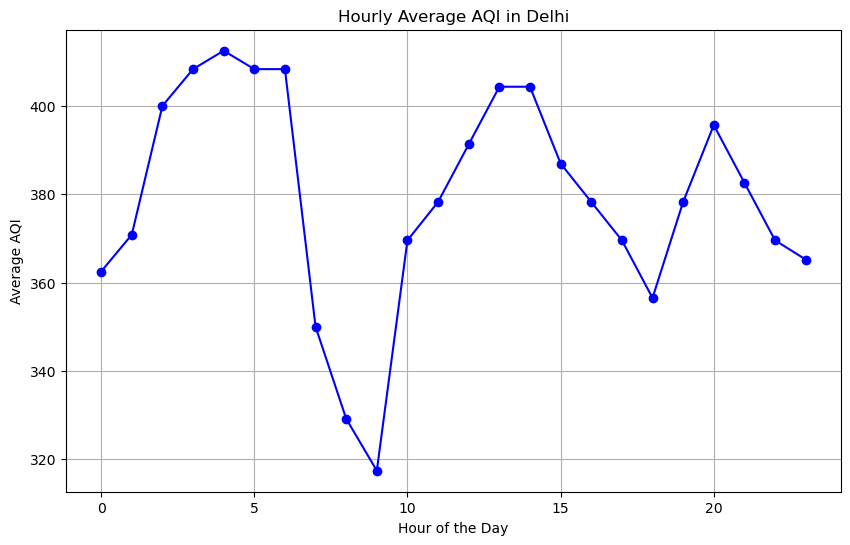

In [47]:
air['date'] = pd.to_datetime(air['date'])

# Extract hour from the datetime column
air['hour'] = air['date'].dt.hour

# Calculate hourly average AQI
hourly_avg_aqi = air.groupby('hour')['AQI'].mean()

# Plot the hourly average AQI
plt.figure(figsize=(10, 6))
hourly_avg_aqi.plot(marker='o', color='b')

plt.title('Hourly Average AQI in Delhi')
plt.xlabel('Hour of the Day')
plt.ylabel('Average AQI')
plt.grid(True)

plt.show()

Here calculates the hourly average AQI by grouping the data by hour and then taking the mean of AQI values for each hour. It then plots the hourly average AQI on a line plot, where the x-axis represents the hour of the day and the y-axis represents the average AQI value. 

Air quality index (AQI) analysis is a crucial aspect of environmental data science that involves monitoring and analyzing air quality in a specific location. It aims to provide a numerical value representative of overall air quality, essential for public health and environmental management.